In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('resumes.csv',encoding='utf-8')
data['cleaned']=''

In [3]:
data.columns

Index(['Category', 'Resume', 'cleaned'], dtype='object')

In [4]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [5]:
data['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Data Science                 40
Blockchain                   40
ETL Developer                40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

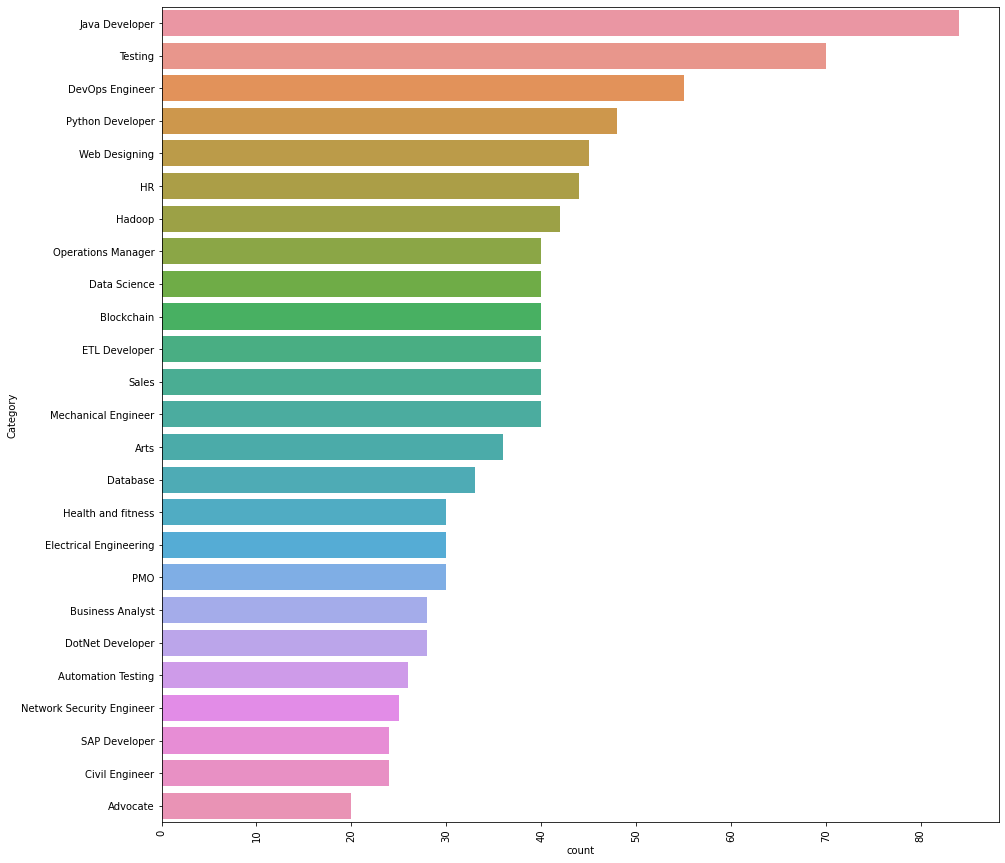

In [6]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category',data=data,order=data['Category'].value_counts().index)
plt.show()

In [7]:
count=data['Category'].value_counts()
labels=data['Category'].unique()

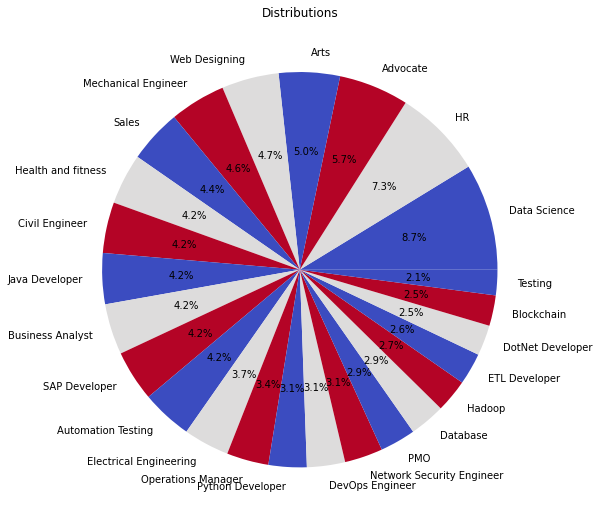

In [8]:
plt.figure(figsize=(20,20))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('coolwarm')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions')
pie=plt.pie(count,labels=labels,autopct='%1.1f%%',colors=colors)

In [9]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) 
    resumeText = re.sub('RT|cc', ' ', resumeText) 
    resumeText = re.sub('#\S+', '', resumeText)  
    resumeText = re.sub('@\S+', '  ', resumeText)  
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  
    return resumeText
    
data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [10]:
data['cleaned_resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleaned_resume, Length: 962, dtype: object

In [11]:
#Wordcloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
set_of_stopwords=set(stopwords.words('english')+['``',"''"])
total=[]
sentences=data['Resume'].values
cleaned=''
for i in range (0,200):
    cleaned_text=cleanResume(sentences[i])
    cleaned+=cleaned_text
    required_words=nltk.word_tokenize(cleaned_text)
    for wrds in required_words:
        if wrds not in set_of_stopwords and wrds not in string.punctuation:
            total.append(wrds)
wrdfrqdist=nltk.FreqDist(total)
most_common=wrdfrqdist.most_common(50)
print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114)]


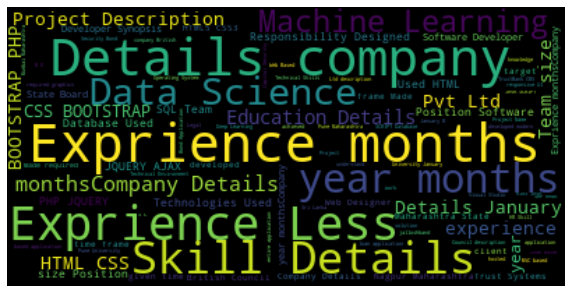

In [13]:
word_count=WordCloud().generate(cleaned)
plt.figure(figsize=(10,10))
plt.imshow(word_count,interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Category']=LE.fit_transform(data['Category'])
data['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['cleaned_resume'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = OneVsRestClassifier(KNeighborsClassifier())
mod.fit(X_train, y_train)
prediction = mod.predict(X_test)

In [17]:
print('Accuracy of Training data: {:.2f}'.format(mod.score(X_train,y_train)))


Accuracy of Training data: 0.99


In [18]:
print('Accuracy of Testing Data: {:.2f}'.format(mod.score(X_test,y_test)))

Accuracy of Testing Data: 0.99


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00         3
          17       1.00    

In [20]:
from sklearn.naive_bayes import MultinomialNB
mod2 = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction = mod2.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(mod2.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(mod2.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (mod2,classification_report(y_test, prediction)))

Accuracy of MultinomialNB Classifier on training set: 0.99
Accuracy of MultinomialNB Classifier on test set: 0.97

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.0